# Predicting Parkinson's Disease- A Case study 

Parkinson’s disease is a progressive neurological disorder. The very first signs of this disease is that the patients faces problems with movements. Tracking Parkinson's disease symptom progression often uses the Unified
Parkinson’s Disease Rating Scale (UPDRS), which requires the patient's presence in clinic, and time-consuming physical examinations by trained medical staff. It makes early detection of disease difficult. However, in recent studies remote replication of UPDRS has appeared  as an alternative approach to predict this disease. Wherein, range of biomedical voice measurements were captured using telemonitoring deive installed at patient's home. These biomedical voice measurements meaures the remote symptom progression. 

Researchers Athanasios Tsanas and Max Little of the University of Oxford, in collaboration with 10 medical centers in the US and Intel Corporation developed the telemonitoring device to record the speech signals and presented it in a form of data set for analysis purpose. The data set is available on UCI repository weblink https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring . The data set is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device. It has 5875 cases represented in 20 features. The details of features are as below:

1. age - Subject age 
2. sex - Subject gender '0' - male, '1' - female 
3. test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment. 
4. motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated 
5. total_UPDRS - Clinician's total UPDRS score, linearly interpolated 
5. Jitter(%)
6. Jitter(Abs)
7. Jitter:RAP
8. Jitter:PPQ5
9. Jitter:DDP - Several measures of variation in fundamental frequency 
10. Shimmer
11. Shimmer(dB)
12. Shimmer:APQ3
13. Shimmer:APQ5
14. Shimmer:APQ11
15. Shimmer:DDA - Several measures of variation in amplitude 
16. NHR
17. HNR - Two measures of ratio of noise to tonal components in the voice 
18. RPDE - A nonlinear dynamical complexity measure 
19. DFA - Signal fractal scaling exponent 
20. PPE - A nonlinear measure of fundamental frequency variation 

Given this medical data set, the objectives of this case study are as follows:

1. Predict total_UPDRS score given voice measurements as features

2. Identify important features that influence total_UPDRS score 

3. Relational strength between total_UPDRS score and other features present in the data set

4. Discover if the diease is age specific

In order to meet above mentioned objectives using machine learning, we need to undergo  machine learning process which include key steps as defined below.

1. Understanding the data

            - distribution of features
            - features types
            
2. Data pre-processing

            - handling missing values(if present in the data set)
            - Scaling (if features are of variant scales)
            - handling categorical features( if present in the data set then converting them to suitable numerical 
              values using Encoder in Sklearn)
3. Selecting supervised technique

            - Classification( if predictive feature is categorical)
            - Regression (if predictive feature is numerical)

4. Selecting right supervised technique for a given problem

           - preparing suit of supervised techniques selected in step 3 ( suit is prepared for the reason that we 
             may not know in advance which algorithm will perform better)  
             
           - selecting the technique with best accuracy score on k- cross validation  
           
5. Hyperparamter optimization of selected supervised technique in step 4

6. Using the selected model for predictive task using appropriate metrices

7. Interpret the results

8. From the selected supervised technique, mine important features for the target class (to address objective 2)

9. Visualization of correlation plot to know relational strength between target feature with other features in the data set

10. Understanding relational between gender and total_UPDRS score 

Below we walk through steps 1-10 mentioned above of the machine learning process using  python to meet the objectives given for this case study. 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import io



# Importing Base  Libraries

# Loading the Data set

In [ ]:
Dataset_pk = pd.read_csv('drive/MyDrive/Colab Notebooks/datasets/parkinsons_n.csv')

# Analysing Data

In [ ]:
print(Dataset_pk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
Dataset_pk_target = Dataset_pk.iloc[:,5]
Dataset_pk=Dataset_pk.drop(['age', 'subject#', 'sex'] , axis=1)
Dataset_pk= Dataset_pk.drop(['total_UPDRS'], axis=1)
# Provide 'Address' as the column name
Dataset_pk['total_UPDRS'] = Dataset_pk_target
print(Dataset_pk.info)


<bound method DataFrame.info of       test_time  motor_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0        5.6431       28.199    0.00662     0.000034     0.00401      0.00317   
1       12.6660       28.447    0.00300     0.000017     0.00132      0.00150   
2       19.6810       28.695    0.00481     0.000025     0.00205      0.00208   
3       25.6470       28.905    0.00528     0.000027     0.00191      0.00264   
4       33.6420       29.187    0.00335     0.000020     0.00093      0.00130   
...         ...          ...        ...          ...         ...          ...   
5870   142.7900       22.485    0.00406     0.000031     0.00167      0.00168   
5871   149.8400       21.988    0.00297     0.000025     0.00119      0.00147   
5872   156.8200       21.495    0.00349     0.000025     0.00152      0.00187   
5873   163.7300       21.007    0.00281     0.000020     0.00128      0.00151   
5874   170.7300       20.513    0.00282     0.000021     0.00135      0.00166

The data set has 5875 rows and 19 features. where, all features are numerical in nature. 

# Inspecting Distribution of Features

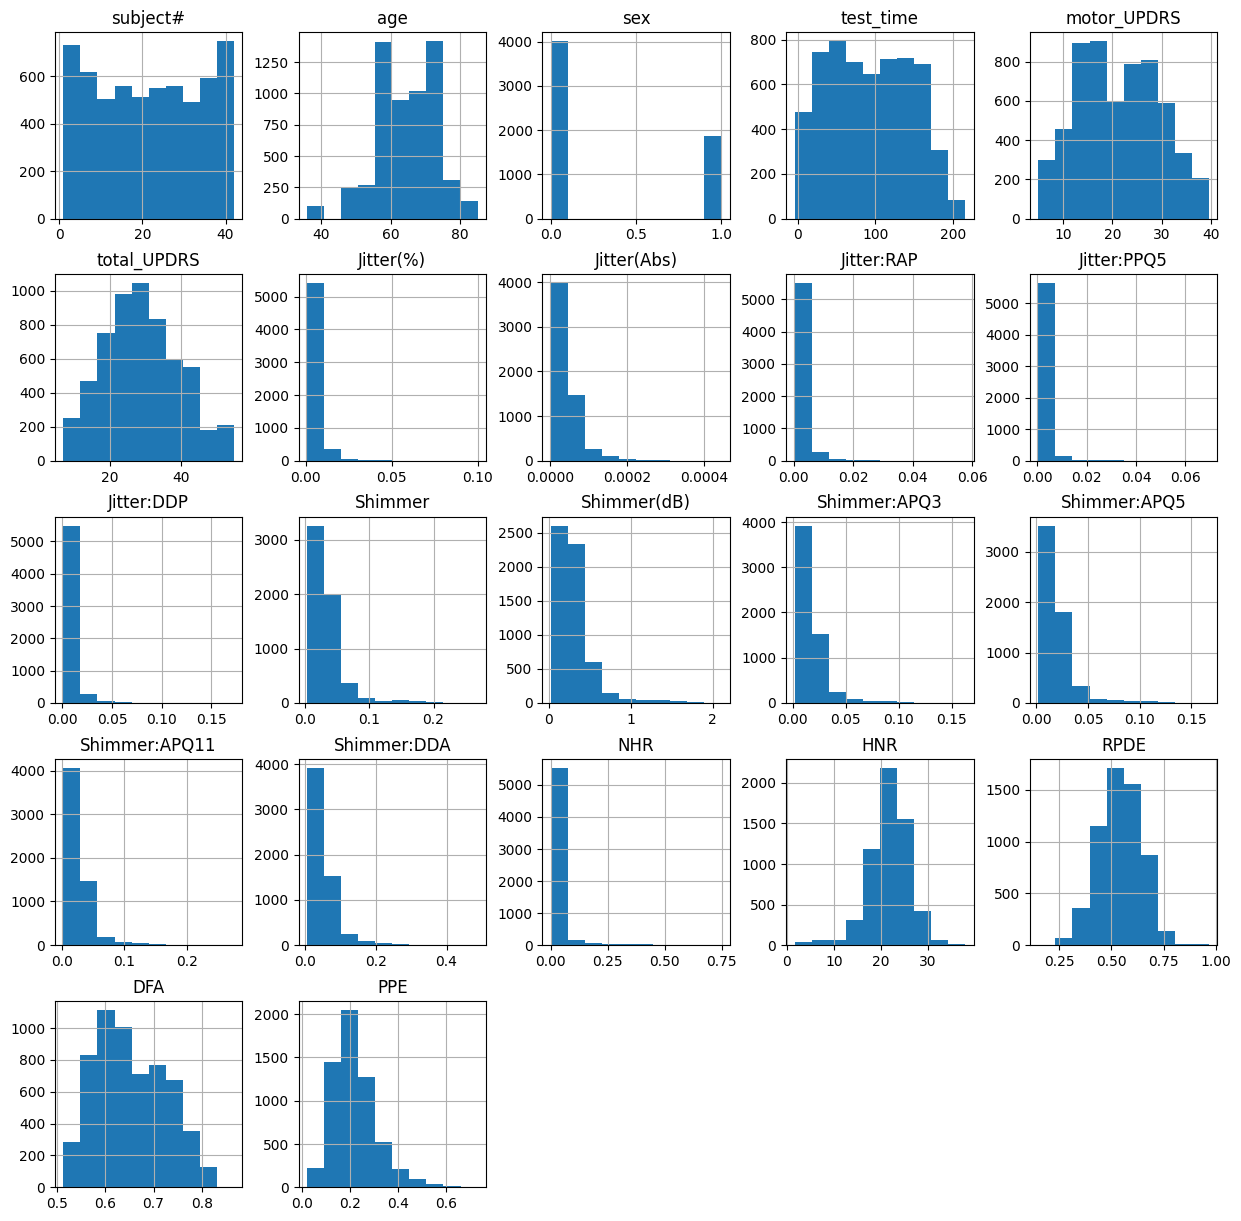

In [ ]:
Dataset_pk.hist( figsize=(15, 15))

plt.show()

The result reveals that all features have different scale. Hence scaling them before applying machine learning models is important to get unbiased results. 

# Inspecting  Features using Boxplot

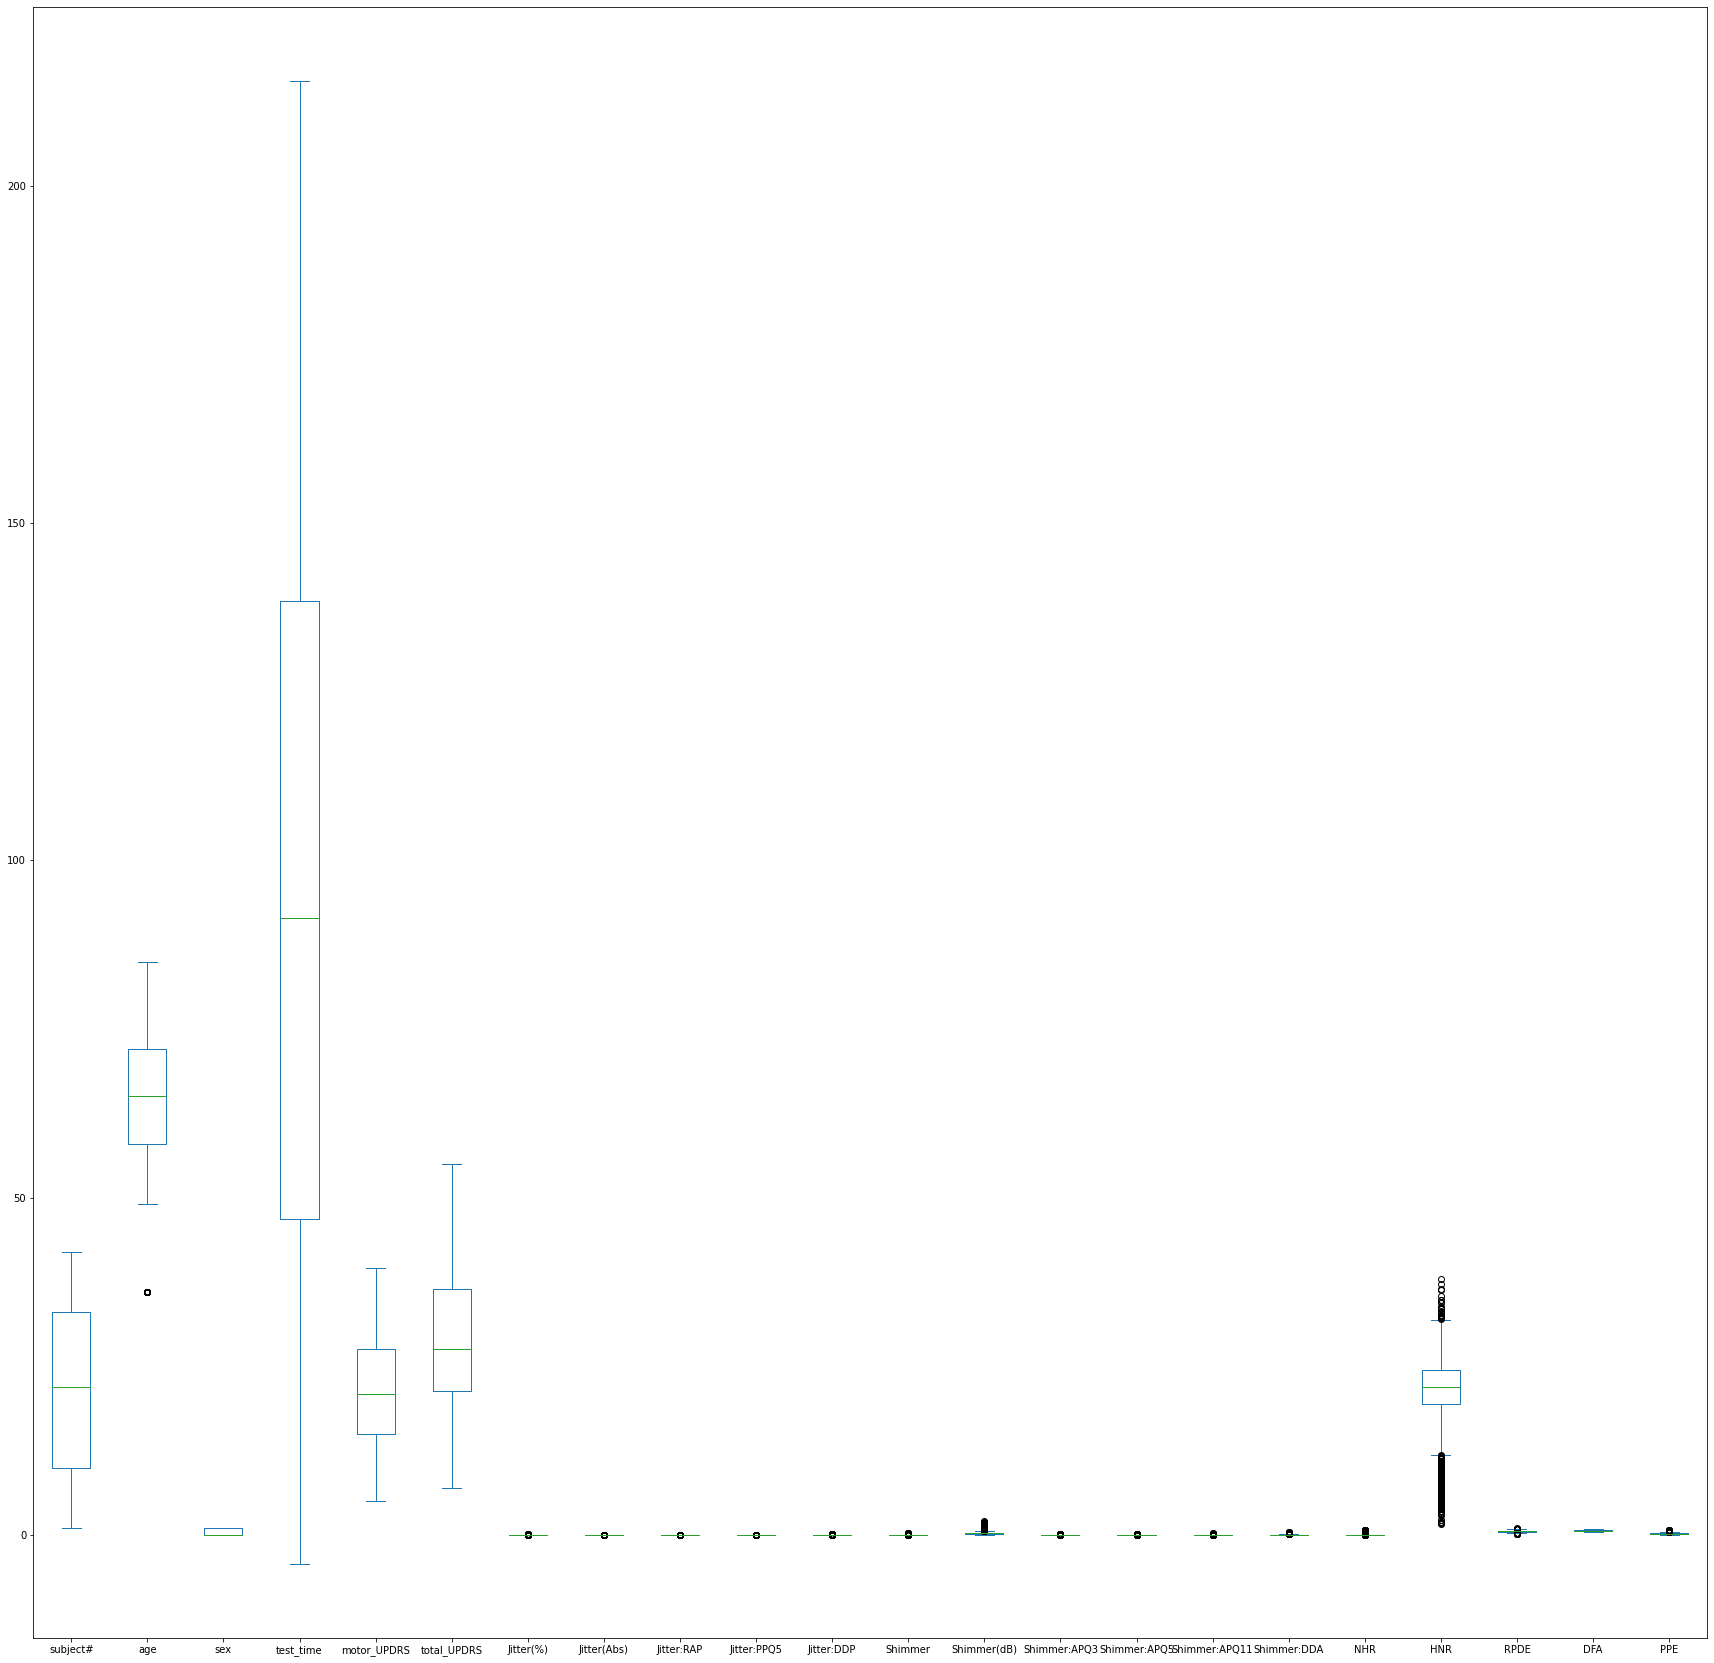

In [ ]:
Dataset_pk.plot(kind='box',figsize=(30,30) )
plt.show()

Boxplot analysis help in identifying the median and outliers present in features. Large difference in median values necessitates scaling down the features. Presence of  very few outliers can be ignored. 

# Visualizing Interactions between features

In [ ]:
grr=pd.plotting.scatter_matrix(Dataset_pk, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, alpha=.6, color='red')

The scatter plot gives a relational structure between pair of variables. For eg. feature Jitter for eg. appears to have positive and strong correlation with Jitter(Abs), Jitter:RAP, Jitter:PPQ5 ,Jitter:DDP. Similarly,   motor_UPDRS and total UPDRS are having strong positive correlation. 

# Visualizing correlation strength

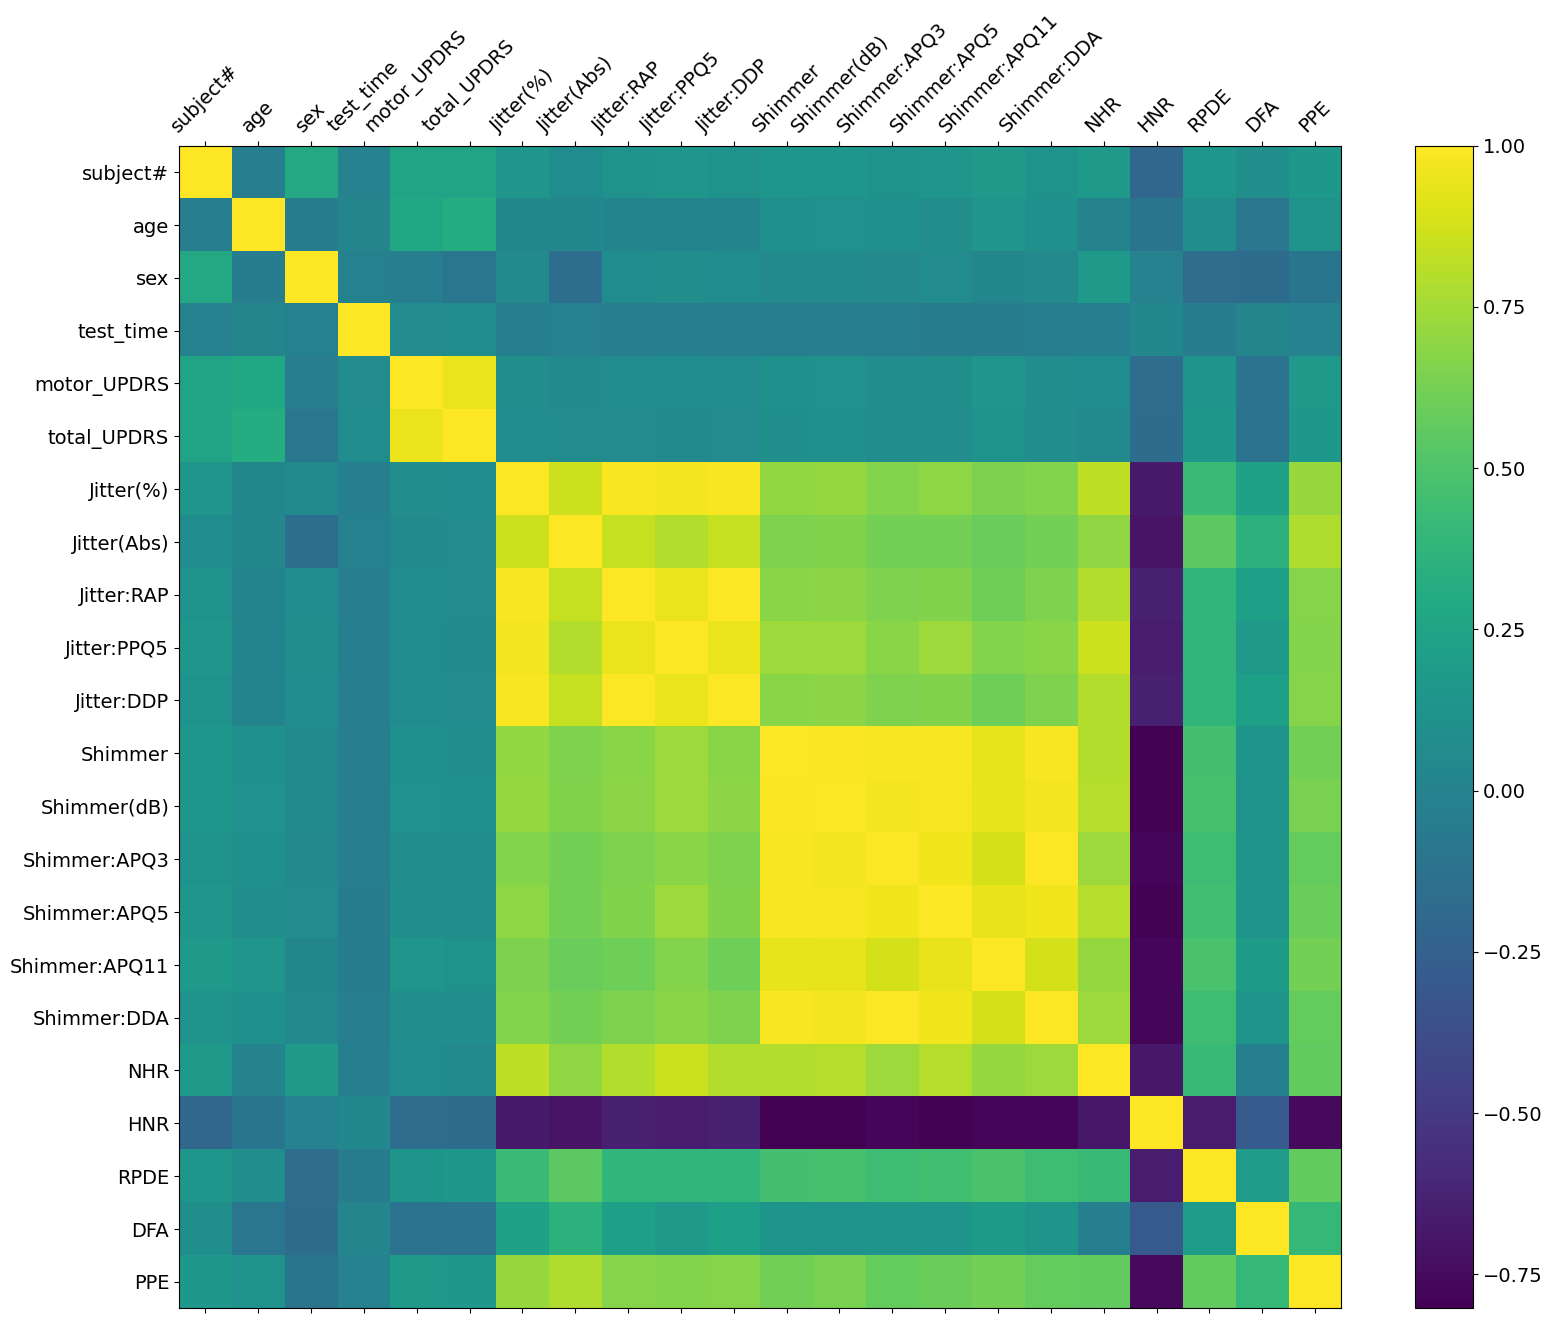

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(Dataset_pk.corr(), fignum=f.number)
plt.xticks(range(Dataset_pk.shape[1]), Dataset_pk.columns, fontsize=14, rotation=45)
plt.yticks(range(Dataset_pk.shape[1]), Dataset_pk.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

The yellow color shows strong positive correlation whereas, purple color indicates strong negative correlation. For eg. it is revealed that HNR has a strong negative relation from Jitter to NHR.

# Selecting Supervised Technique

The choice is supervised technique is Regression since the total_UPDRS(the predictive feature) is numerical in nature. 

# Design Hold-Out enviornment 

In [ ]:
# importing method to perform cross validation
from sklearn.model_selection import train_test_split 


In [ ]:
# My_data contains all data points from My_data set from from third feature to 19th feature(indicator features)
My_data = Dataset_pk.iloc[:,0:18] 

# My_target contains class information which is 19th feature in the data set of 

My_data_target=Dataset_pk.iloc[:,18]
print(My_data_target.shape)

#print(Y_test.head())

(5875,)


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(My_data, My_data_target, test_size=0.8, random_state=10)


# Selecting right Regression technique for a given problem

Since we do not have prior knowledge which model will perform best for a given problem so, we make suit of regression model (both linear and non-linear)and choose the model that performs best under cross validation. However, it is important to first standardize the data for the reason that all features are in different scales. 

We make use of Sklearn Pipeline to streamline the process of standardization and building Regression suit. The process starts with loading appropriate libraries from sklearn. 

In [ ]:
# importing linear and non linear regression models
from sklearn import linear_model  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

# importing sklearn Pipeline to automate the ML processes
from sklearn.pipeline import Pipeline

# importing sklearn preprocessing methods
from sklearn.preprocessing import StandardScaler

# Automating standardization and Regression suit using Sklearn Pipeline

In [ ]:
# making pipeline of standardization and various regression models

Pipeline_Models = []
Pipeline_Models.append(('scaledLR', Pipeline([('Scaler', StandardScaler()),
                                             ('LRmodel', linear_model.LinearRegression()
                                             )]))) 
Pipeline_Models.append(('scaledLasso', Pipeline([('Scaler', StandardScaler()),
                                             ('Lassomodel', linear_model.Lasso()
                                             )]))) 

Pipeline_Models.append(('scaledRidge', Pipeline([('Scaler', StandardScaler()),
                                             ('Ridgemodel', linear_model.Ridge()
                                             )]))) 


Pipeline_Models.append(('scaledSVR', Pipeline([('Scaler', StandardScaler()),
                                             ('SVRmodel', SVR()
                                             )]))) 


Pipeline_Models.append(('scaledCART', Pipeline([('Scaler', StandardScaler()),
                                             ('CARTmodel', DecisionTreeRegressor()
                                             )]))) 


Pipeline_Models.append(('scaledKNN', Pipeline([('Scaler', StandardScaler()),
                                             ('KNNmodel', KNeighborsRegressor()
                                             )])))

    

# Evaluating the Best performer

In [ ]:
# loading cross validation libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# creating empty lists to store results of cross validation and the name of the model
Model_Eval_Score =[]
Name_of_model =[]
# applying cross validation on each algorithm in suit
for name, model_detail in Pipeline_Models:
    # intiating cross validation with 10 iterations
    kfold = KFold(n_splits=10)
     # applying cross validation with 10 iterations on the training data
    CV_Results = cross_val_score(model_detail, X_train, Y_train, cv=kfold,scoring='neg_mean_squared_error')
    # adding result of each iteration in list
    Model_Eval_Score.append(CV_Results)
    # name of the corresponding algorithm is stored as follows
    Name_of_model.append(name)

# creating DataFrame with cross validation results where each row indicates the performance 
# of the model on different cross validation iterations
CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score,index=['LR','Lasso', 'Ridge',  
                                 'SVR', 'CART', 'KNN'])
print("The 10 cross validation results of each regressor algoritm are: \n")
# printing the transpose of the data frame so that each column is a unique model
Table_Results_CV= pd.DataFrame(CV_IterationsBy_model.T)
print(Table_Results_CV)
print("\n")
# printing the mean of R2 square of each model
print("The mean performance of each regressor algorithm are: \n")
print(Table_Results_CV.mean())
print("The standaard deviattion of each regressor algorithm are: \n")
print(Table_Results_CV.std())



The 10 cross validation results of each regressor algoritm are: 

          LR      Lasso      Ridge        SVR       CART        KNN
0 -14.056344 -14.805505 -13.887018 -18.292233 -10.413904 -11.825803
1 -10.251254 -11.369818 -10.208897 -13.500490  -9.322948 -14.909099
2 -12.130726 -13.597621 -12.202333 -16.039134  -8.250228 -13.424328
3 -17.715026 -16.790068 -17.437916 -21.866914  -8.886713 -14.412782
4 -13.657759 -15.704785 -13.688048 -19.978212  -8.878029 -14.516528
5 -10.829915 -11.813173 -10.907676 -16.927711 -11.340475 -12.292517
6 -14.478588 -16.704248 -14.482165 -18.526669 -14.316215 -11.380969
7  -9.404350  -9.457956  -9.276009 -10.871697 -10.725688 -11.186925
8 -13.750885 -13.654935 -13.457756 -18.348744 -12.236458 -16.201272
9 -11.241109 -12.559514 -11.279231 -15.305355  -8.166183 -11.844432


The mean performance of each regressor algorithm are: 

LR      -12.751595
Lasso   -13.645762
Ridge   -12.682705
SVR     -16.965716
CART    -10.253684
KNN     -13.199466
dtype: float64

Based on the outcome of cross validation, Decision tree is identified as the best Regression model for the given data set

# Hyperparameter Optimization of Decision tree

In [ ]:
# loading GridSearchCV() for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# It is important to standardize the training data set before applying hyerparameter optimization for the 
# said model as this model was discovered by cross validation which used standardized training data. 

# create object of StandardScaler()


# My_target contains class information which is 19th feature in the data set of 


Standardisation = StandardScaler()
Standardisation.fit(X_train)
Scaleddata_trainX= Standardisation.transform(X_train)
#Scaleddata_trainY= Standardisation.transform(Y_test)

# setting paramters
param_grid_DTR = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
# setting paramters

# Creating instance of SVR model
Model_DTR = DecisionTreeRegressor()
# Using GridSearchCV to pass the model,values to parameters for tuning
# and cross validation folds
Grid_DTR = GridSearchCV(estimator =Model_DTR, param_grid=param_grid_DTR , cv=5)
# fitting the model on the training set
Grid_DTR.fit(Scaleddata_trainX,Y_train )
# printing the best parameters from the given list for the data set in consideration


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [ ]:
Grid_DTR.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

# Fitting the tuned parameter on the scaled training data set

In [ ]:
Model_DTR = DecisionTreeRegressor(max_depth= 8,
 max_leaf_nodes= 100,
 min_samples_leaf = 20,
 min_samples_split=  10)

Model_DTR.fit(Scaleddata_trainX,Y_train)


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10)

# Evaluating Performance of CART on Test data

It is important to perform same standardization on Test data as done on Training data  before using CART for Predictive task. 

In [ ]:
Scaleddata_test= Standardisation.transform(X_test)

In [ ]:
# Getting prediction on train and test sets

DTR_pred_test= Model_DTR.predict(Scaleddata_test)


In [ ]:
print("Mean absolute Error:", metrics.mean_absolute_error(Y_test, DTR_pred_test))
print("\n")
print("Mean squared Error:", metrics.mean_squared_error(Y_test, DTR_pred_test))
print("\n")
print("R2 score:", round(metrics.r2_score(Y_test,DTR_pred_test),3)*100,"%")

Mean absolute Error: 2.206622495979164


Mean squared Error: 8.798584987090395


R2 score: 92.30000000000001 %


The performance of CART is excellent as indicated by R2 score with low MAE. It shows the robustness of model on this dataset. 

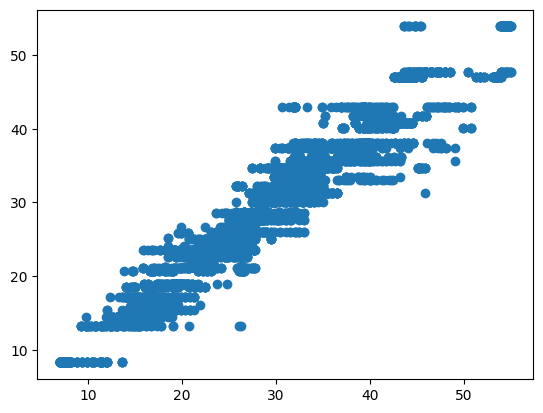

In [ ]:
# plotting predicted VS actual 
plt.scatter(Y_test, DTR_pred_test)

# Inspecting tree of CART 

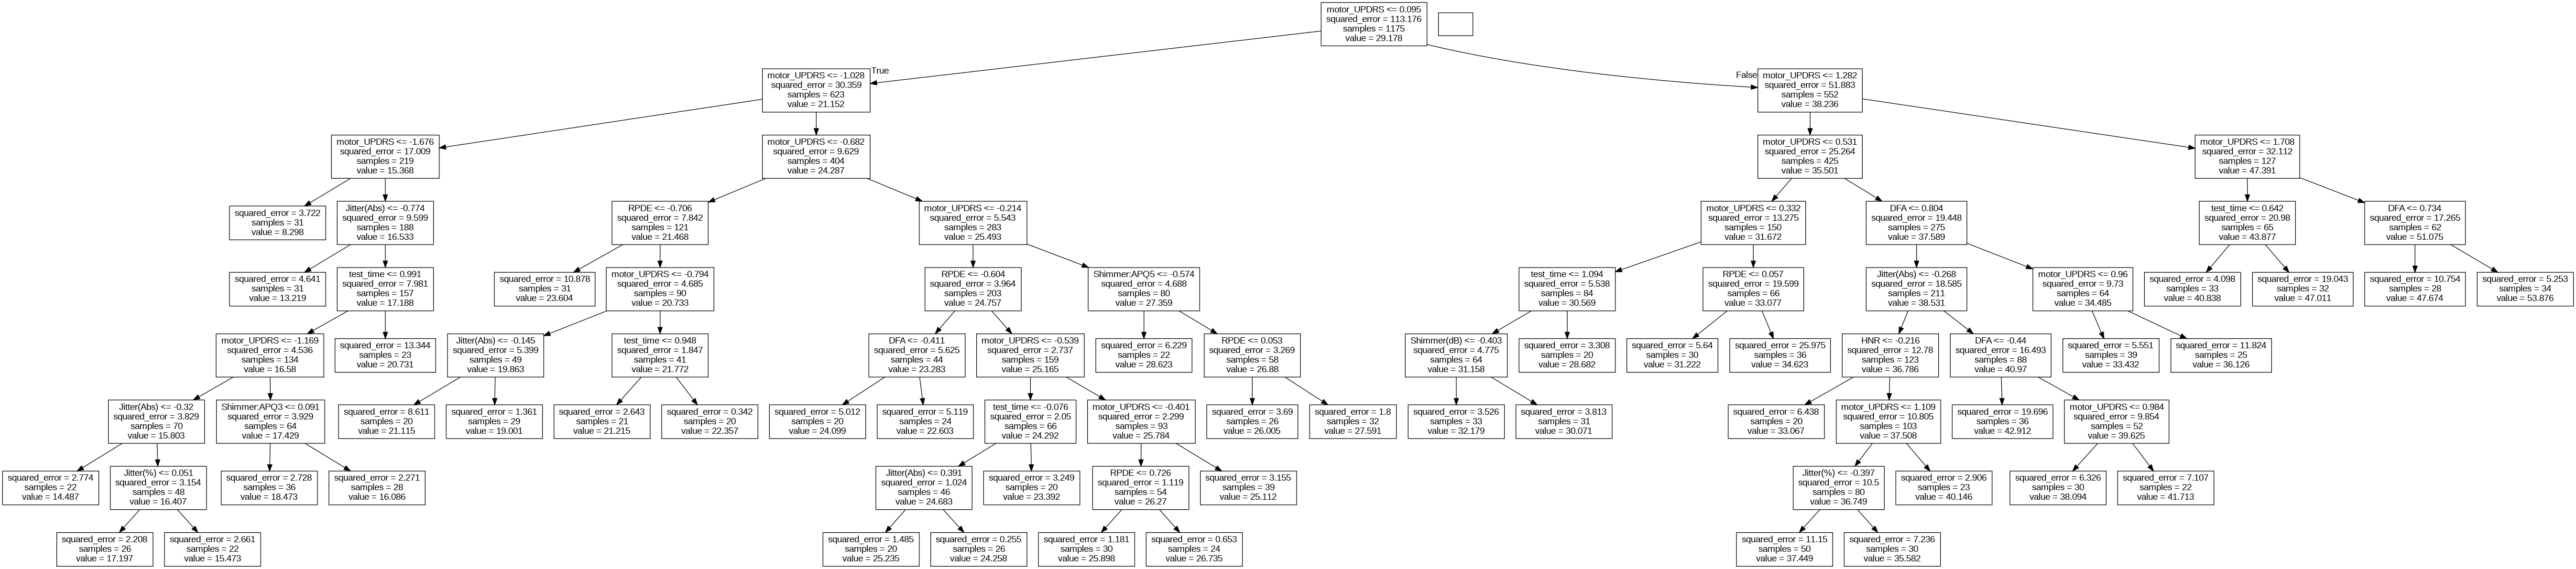

In [ ]:
# Create DOT data. The first argument in tree.export_graphviz is the model name, out_file is used to write 
# model into out_file, next parameters are information on indicator and predictive parameters 

from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(Model_DTR,feature_names=My_data.columns,
                                class_names=['total_UPDRS '] )

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


Interesting rules can be mined  by following each  branch of decision tree


# Discovering important features from CART

In [ ]:
#printing score of importance to features using feature_importances_ function of the model


CART_featureImportance= pd.DataFrame({'Feature_name':My_data.columns, 'Importance Score':Model_DTR.feature_importances_ })  

print(CART_featureImportance)




     Feature_name  Importance Score
0       test_time          0.008664
1     motor_UPDRS          0.957385
2       Jitter(%)          0.000803
3     Jitter(Abs)          0.011356
4      Jitter:RAP          0.000000
5     Jitter:PPQ5          0.000000
6      Jitter:DDP          0.000000
7         Shimmer          0.000000
8     Shimmer(dB)          0.000566
9    Shimmer:APQ3          0.000715
10   Shimmer:APQ5          0.000386
11  Shimmer:APQ11          0.000000
12    Shimmer:DDA          0.000000
13            NHR          0.000000
14            HNR          0.002632
15           RPDE          0.004356
16            DFA          0.013138
17            PPE          0.000000
